In [ ]:
ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

['no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses']
           age prescript astigmatic tearRate
0        young     myope         no  reduced
1        young     myope         no   normal
2        young     myope        yes  reduced
3        young     myope        yes   normal
4        young     hyper         no  reduced
5        young     hyper         no   normal
6        young     hyper        yes  reduced
7        young     hyper        yes   normal
8          pre     myope         no  reduced
9          pre     myope         no   normal
10         pre     myope        yes  reduced
11         pre     myope        yes   normal
12         pre     hyper         no  reduced
13         pre     hyper         no   normal
14         pre     hyper        yes  reduced
15         p

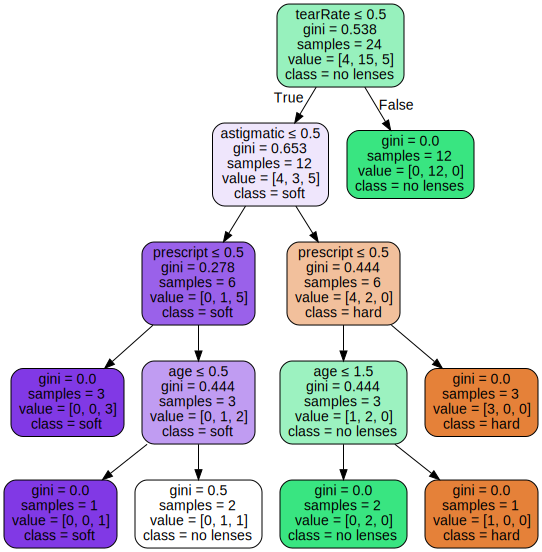

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus
import graphviz

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'  #注意修改你的路径

file = open('E:/github/Machine__Learning/data/DECISION_TREE/lenses.txt')
lenses = [inst.strip().split('\t') for inst in file.readlines()]
lenses_target = []                                                        #提取每组数据的类别，保存在列表里
for each in lenses:
    lenses_target.append(each[-1])
print(lenses_target)
labels = ['age', 'prescript', 'astigmatic', 'tearRate']
# 将其转换成 DataFrame
dic = {}
for label in labels:
    dic[label] = []
for data in lenses:
    for a,label in zip(data,labels):
        dic[label].append(a)
data = pd.DataFrame(dic)
print(data)
le = LabelEncoder()                                                        #创建LabelEncoder()对象，用于序列化            
for col in data.columns:                                            #为每一列序列化
    data[col] = le.fit_transform(data[col])
print(data)
# 绘制树模型
# 特征数据
clf = tree.DecisionTreeClassifier(max_depth = 4)                        #创建DecisionTreeClassifier()类
clf = clf.fit(data.values.tolist(), lenses_target)                    #使用数据，构建决策树

tree.export_graphviz(clf)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names = data.keys(),
                    class_names = clf.classes_,
                    filled=True, rounded=True,
                    special_characters=True)
graphviz.Source(dot_data)

In [33]:
graph = graphviz.Source(dot_data)
graph.render('finish')

'finish.pdf'

In [34]:
print(clf.predict([[1,1,1,0]])) 

['hard']
